# Week2授業前課題1

## 【課題】統計基礎用語の説明
- 標準偏差について、分散との違いや関係性、どんな時に使う指標なのかをお答えください。  
標準偏差、分散はどちらも中心値（平均値）からのバラツキの大きさを示す値である。標準偏差は分散の平方根であるが、標準偏差は元に比較する値と単位が同一のため、平均値からどれくらい離れているかということを標準偏差から求めることができる。使用例としては、受験集団における自分の位置を確認する指標（偏差値）や、製造部品の品質管理時にバラツキが発生していないか確認する際の指標として用いられる。  
  
  
- 共分散行列について述べてください。  
共分散行列とは，データの散らばり具合や相関という情報を集約して行列としたものである。行列のうち、対角成分には分散が並び、非対角成分には共分散が並ぶため、分散共分散行列とも呼ばれる。共分散行列を基準化することにより、相関関係を求めることができたり、固有値・固有ベクトルを求めることでその分布の大まかな様子が分かる。
  
  
- 1次元の正規分布と多次元の正規分布について述べてください。特にどういう時に使うのかについてお答えください。  
1次元の正規分布は、確率変数が１つのみの正規分布であり、分散のみを利用して作られる左右対称の連続型の確率分布である。
多次元の正規分布は、確率変数が２つ以上の場合に用いられる正規分布であり、共分散行列を利用して作られる多次元の確率分布である。
１次元の正規分布は、テストの点数におけるバラツキを示す際などに使用され、多次元の正規分布は、統計における多変量データモデルの解析時などに使用される。



## 【課題】データ点の作成
2次元正規分布を用いて、中心(平均)が(-3,0)と(0,-3)、共分散行列が以下で表現される確率分布から生成されるデータ点を500個ずつ作成せよ。
その際、片方の500個のデータにはdata1、もう片方の500個のデータにはdata2と名付けて作成せよ。

$$
    \left[
    \begin{array}{rr}
    1.0 & 0.8\\
    0.8 & 1.0 \\
    \end{array}
    \right]
$$

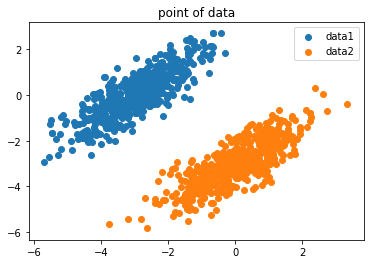

In [182]:
import numpy as np
import matplotlib.pyplot as plt
 
#データの中心（平均）
mu1 = [-3, 0]
mu2 = [0, -3]

#共分散行列
sigma = [
    [1.0, 0.8], 
    [0.8, 1.0]
]
 
# 2次元正規乱数を500個生成
data1 = np.random.multivariate_normal(mu1, sigma, 500)
data2 = np.random.multivariate_normal(mu2, sigma, 500)
 
# 散布図
plt.title("point of data")
plt.scatter(data1[:,0], data1[:,1], label="data1")
plt.scatter(data2[:,0], data2[:,1], label="data2")
plt.legend()

# 【課題】データ点へのラベル付け
実際に扱うデータは各データが何のグループに属しているのかラベル付けされていなければなりません。
今回は二つの確率分布からデータをサンプリングしていますので、各500個のデータに対して、2つの確率分布のうち、どちらの確率分布からサンプリングされたものなのか、ラベル付けする必要があります。

上で作成した500個×2のデータに対してラベル付けをしてください、割り当てるラベルは区別できれば何でもいいですが、ここでは簡単に0と1にしてください。

やり方はたくさんありますが、ヒントを示します。

- ２つの確率分布からサンプリングされたデータ(numpy配列)をnp.concatenateを用いて結合する。
- 結合した行列の上から500番目までは1を割り振り、501番目~1000番目に0を割り振る。割り振る際は、結合した配列の３列目にラベルの列を追加する。1、2列目にはすでに、各データのx座標とy座標が格納されています。

In [183]:
#data1とdata2の結合
conca_data = np.concatenate([data1, data2], axis=0)

#結合データの全ての行の３列目に1を割り振る
conca_data = np.insert(conca_data, 2, 1, axis=1)

#501番目〜１０００番目の３列目を０に置換する
conca_data[500:, 2] = 0 

# 出力
print(conca_data)

[[-3.63798346 -0.39838408  1.        ]
 [-2.65607542  0.7548385   1.        ]
 [-5.33554865 -1.94147658  1.        ]
 ...
 [ 0.05934432 -2.32038106  0.        ]
 [ 1.15370039 -1.78168525  0.        ]
 [ 0.06396494 -2.37436117  0.        ]]


## 【課題】正しくラベル付けされているか見てみる
前回の課題でも登場したmatplotlibを使って可視化しましょう。

雛形として以下を用いてください。?の部分はご自身で考えてください。

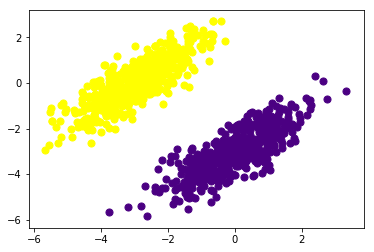

In [187]:
import matplotlib.pyplot as plt
%matplotlib inline

# 1〜500番目のデータをセット、色は黄色
plt.scatter(conca_data[0:499:,0], conca_data[0:499:,1], s=50, c="#ffff00", marker='o')
# 501〜1000番目のデータをセット、色は紫
plt.scatter(conca_data[500:,0], conca_data[500:,1], s=50, c="#4b0082", marker='o')
# 出力
plt.show()